# Analyse du fichier Automobiles

Dans cet exercice, nous utilisons Automobile Dataset pour l’analyse des données. Cet ensemble de données présente différentes caractéristiques d’une automobile telles que le style de carrosserie, l’empattement, le type de moteur, le prix, le kilométrage, la puissance, etc.

In [46]:
import pandas as pd
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

## __Question 1 :__ 
À partir du jeu de données donné, imprimez les cinq premières et dernières lignes.

In [15]:
df = pd.read_csv('Automobile_data.csv')
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


## __Question 2:__
Quel est le nombre total de lignes et de colonnes du fichier?

In [13]:
print('Nombre de ligne:', df.shape[0])
print('Nombre de colonnes:', df.shape[0])

Nombre de ligne: 61
Nombre de colonnes: 61


## __Question 3:__
Imprimer le type de données des colonnes

In [14]:
df.dtypes

index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

## __Question 4:__
Nettoyer le jeu de données et mettre à jour le fichier CSV
Remplacez toutes les valeurs de colonne qui contiennent `n.a` ou `?` par `NaN`
Eregistrer le resultat dans un fichier nommé 'Automobile_data_nettoye.csv'

In [21]:
# Solution 1
df = pd.read_csv("Automobile_data.csv", na_values={
'price':["?","n.a"],
'stroke':["?","n.a"],
'horsepower':["?","n.a"],
'peak-rpm':["?","n.a"],
'average-mileage':["?","n.a"]})

    index      company   body-style  wheel-base  length engine-type  \
0       0  alfa-romero  convertible        88.6   168.8        dohc   
1       1  alfa-romero  convertible        88.6   168.8        dohc   
2       2  alfa-romero    hatchback        94.5   171.2        ohcv   
3       3         audi        sedan        99.8   176.6         ohc   
4       4         audi        sedan        99.4   176.6         ohc   
..    ...          ...          ...         ...     ...         ...   
56     81   volkswagen        sedan        97.3   171.7         ohc   
57     82   volkswagen        sedan        97.3   171.7         ohc   
58     86   volkswagen        sedan        97.3   171.7         ohc   
59     87        volvo        sedan       104.3   188.8         ohc   
60     88        volvo        wagon       104.3   188.8         ohc   

   num-of-cylinders  horsepower  average-mileage    price  
0              four         111               21  13495.0  
1              four        

In [22]:
# Solution 2
# Define the list of strings to be recognized as missing values
missing_values = ["?", "n.a"]

# Replace the specific values with NaN in the entire DataFrame
df.replace(missing_values, pd.NA, inplace=True)

In [23]:
df.to_csv("Automobile_data_nettoye.csv")

## __Question 5:__ 
Trouver le nom de l’entreprise automobile la plus chère

In [31]:
# Solution
df[df['price'] == df['price'].max()]
# aussi df[df.price == df['price'].max()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


In [33]:
# Solution
df[['company','price']][df.price == df['price'].max()]

,company,price
35,mercedes-benz,45400.0


## __Question 6:__ 
Imprimer tous les détails des voitures Toyota

In [49]:
# Solution 1
df[df.company == 'toyota']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [51]:
# Solution 2
car_Manufacturers = df.groupby('company')
toyotaDf = car_Manufacturers.get_group('toyota')
toyotaDf

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [47]:
car_Manufacturers = df.groupby('company')
# Iterating through the groups and their respective data
for group_name, group_data in car_Manufacturers:
    print(f"Group Name: {group_name}")
    print(group_data)  # This will print the data corresponding to each group
# Accessing a specific group and printing its data
toyota_group = car_Manufacturers.get_group('toyota')
print(toyota_group)

Group Name: alfa-romero
   index      company   body-style  wheel-base  length engine-type num-of-cylinders  horsepower  average-mileage    price
0      0  alfa-romero  convertible        88.6   168.8        dohc             four         111               21  13495.0
1      1  alfa-romero  convertible        88.6   168.8        dohc             four         111               21  16500.0
2      2  alfa-romero    hatchback        94.5   171.2        ohcv              six         154               19  16500.0
Group Name: audi
   index company body-style  wheel-base  length engine-type num-of-cylinders  horsepower  average-mileage    price
3      3    audi      sedan        99.8   176.6         ohc             four         102               24  13950.0
4      4    audi      sedan        99.4   176.6         ohc             five         115               18  17450.0
5      5    audi      sedan        99.8   177.3         ohc             five         110               19  15250.0
6      6   

## __Question 7:__ 
Compter le nombre total de voitures par entreprise  
*resultat attendu:*  
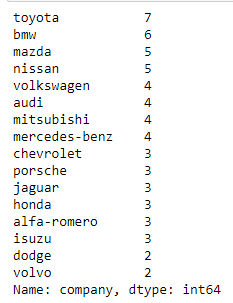

In [53]:
df['company'].value_counts()

company
toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: count, dtype: int64

## __Question 8:__  
Trouver la voiture à prix élevé de chaque entreprise  
*resultat attendu:*  
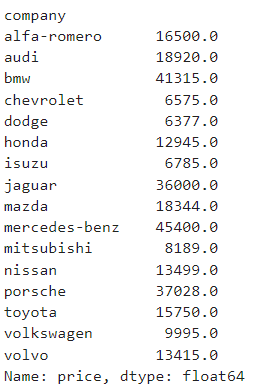

In [60]:
car_Manufacturers = df.groupby('company')
priceSer = car_Manufacturers['price'].max()
priceSer

company
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu             6785.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

In [59]:
priceDf = car_Manufacturers[['price']].max()
priceDf

,price
company,
alfa-romero,16500.0
audi,18920.0
bmw,41315.0
chevrolet,6575.0
dodge,6377.0
honda,12945.0
isuzu,6785.0
jaguar,36000.0
mazda,18344.0


## __Question 9:__  
Trouver le kilométrage moyen de chaque constructeur automobile

*resultat attendu:*  
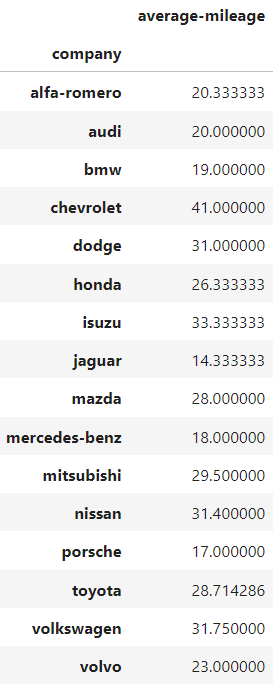

In [62]:
car_Manufacturers = df.groupby('company')
mileageDf = car_Manufacturers[['average-mileage']].mean()
mileageDf

,average-mileage
company,
alfa-romero,20.333333
audi,20.000000
bmw,19.000000
chevrolet,41.000000
dodge,31.000000
honda,26.333333
isuzu,33.333333
jaguar,14.333333
mazda,28.000000


## __Question 10:__  
Concaténer deux DataFrames suivants
>~~~Python
>GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
>japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 23600, 61500 , 58900]}
>~~~

*resultat attendu:*   
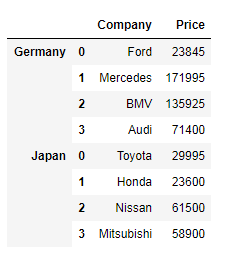

In [63]:
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
carsDf1 = pd.DataFrame.from_dict(GermanCars)

japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 23600, 61500 , 58900]}
carsDf2 = pd.DataFrame.from_dict(japaneseCars)

carsDf = pd.concat([carsDf1, carsDf2], keys=["Germany", "Japan"])
carsDf

Company   Price
Germany 0         Ford   23845
        1     Mercedes  171995
        2          BMV  135925
        3         Audi   71400
Japan   0       Toyota   29995
        1        Honda   23600
        2       Nissan   61500
        3  Mitsubishi    58900

## __Question 10:__  Fusionner DataFrame
Créez deux trames de données à l’aide des deux Dicts suivants, fusionnez deux trames de données et ajoutez la deuxième trame de données en tant que nouvelle colonne à la première trame de données. 
>~~~Python
>Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
>car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}
>~~~

*resultat attendu:*  
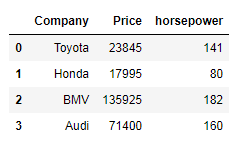

In [64]:
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
carPriceDf = pd.DataFrame.from_dict(Car_Price)

car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}
carsHorsepowerDf = pd.DataFrame.from_dict(car_Horsepower)

carsDf = pd.merge(carPriceDf, carsHorsepowerDf, on="Company")
carsDf

,Company,Price,horsepower
0,Toyota,23845,141
1,Honda,17995,80
2,BMV,135925,182
3,Audi,71400,160
